In [2]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
corpus = pd.read_csv("./data/corpus.csv")
train = pd.read_csv('./data/train.csv')
test = pd.read_csv("./data/public_test.csv")

In [16]:
test

,question,qid
0,Hiệp hội Công nghiệp ghi âm Việt Nam hoạt động trong những lĩnh vực nào?,98440
1,Báo cáo nghiên cứu khả thi đầu tư xây dựng là tài liệu trình bày về các nội dung gì?,105737
2,"Lịch khai giảng năm học 2022 - 2023 đối với học sinh giáo dục mầm non, giáo dục phổ thông và giáo dục thường xuyên là khi nào?",106239
3,Số định danh cá nhân có được dùng thay thế các giấy tờ liên quan đến nhân thân khi thực hiện các thủ tục liên quan đến nhà ở không?,79491
4,"Trợ cấp đối với Chủ tịch Hội cựu chiến binh cấp xã nghỉ hưu, thôi làm công tác Hội được tính thế nào?",130557
...,...,...
9995,Đón trả hành khách trên đường cao tốc có bị giữ phương tiện hay không?,42798
9996,"Các đơn vị được giao là đầu mối trao đổi, cung cấp thông tin của cơ quan Hải quan có trách nhiệm gì?",10533
9997,Ban Thường vụ Hội Hỗ trợ khắc phục hậu quả bom mìn Việt Nam hoạt động theo những nguyên tắc nào?,46794
9998,"Tài liệu thông tin, giáo dục, truyền thông về nuôi dưỡng trẻ nhỏ phải bảo đảm nội dung gì?",112007


In [5]:
corpus[corpus['text'].str.contains('điều', na=False)]

,text,cid
17,"Thông tư này điều chỉnh đối với cơ quan đại diện nước Cộng hòa xã hội chủ nghĩa Việt Nam ở nước ngoài bao gồm cơ quan đại diện ngoại giao, cơ quan đại diện lãnh sự, cơ quan đại diện tại tổ chức quốc tế theo quy định tại Điều 4 của “Luật cơ quan đại diện nước Cộng hòa xã hội chủ nghĩa Việt Nam ở nước ngoài”.",17
20,"Cơ quan đại diện sử dụng biểu tượng quốc gia nước Cộng hòa xã hội chủ nghĩa Việt Nam, biểu tượng của quốc gia hoặc của tổ chức quốc tế tiếp nhận và tổ chức các hoạt động đối ngoại phù hợp với quy định của Thông tư này và các nguyên tắc sau đây:\n1. Phù hợp với chức năng, nhiệm vụ của cơ quan đại diện trong quan hệ với quốc gia, tổ chức quốc tế tiếp nhận.\n2. Phù hợp với quy định của pháp luật Việt Nam về nghi thức nhà nước đối với các cơ quan nhà nước Việt Nam.\n3. Phù hợp với các quy định của các thỏa thuận và điều ước quốc tế mà Việt Nam ký kết hoặc tham gia.\n4. Phù hợp với luật và thông lệ quốc tế, pháp luật của quốc gia, quy định của tổ chức quốc tế tiếp nhận và quy định của địa phương nơi cơ quan đại diện đặt trụ sở cơ quan, văn phòng trực thuộc.",20
33,"1. Cơ quan đại diện và văn phòng trực thuộc nếu đóng tại địa phương khác nơi đặt trụ sở cơ quan đại diện tổ chức chiêu đãi tiếp khách chào mừng Quốc khánh nước Cộng hòa xã hội chủ nghĩa Việt Nam theo quy định của Nhà nước và hướng dẫn của Bộ Ngoại giao.\n2. Chủ trì chiêu đãi tiếp khách là người đứng đầu cơ quan đại diện, văn phòng trực thuộc tại thời điểm tổ chức chiêu đãi tiếp khách. Tùy theo thông lệ lễ tân tại nước sở tại, tổ chức quốc tế tiếp nhận, điều kiện thực tế của cơ quan đại diện, người đứng đầu cơ quan đại diện, văn phòng trực thuộc và phu nhân hoặc phu quân chủ trì chiêu đãi.\n3. Giấy mời chiêu đãi có hình quốc huy nước Cộng hòa xã hội chủ nghĩa Việt Nam đối với của người đứng đầu và người đứng đầu tạm thời cơ quan đại diện gồm:\n- Đại sứ quán: Đại sứ đặc mệnh toàn quyền, Đại biện, Đại biện lâm thời.\n- Tổng Lãnh sự quán: Tổng Lãnh sự; Lãnh sự quán: Lãnh sự.\n- Cơ quan đại diện tại tổ chức quốc tế: Đại diện thường trực, Quan sát viên thường trực hoặc Đại diện của Chủ tịch nước hay người được chính thức chỉ định tạm thời thay thế người đứng đầu phù hợp với quy định của Việt Nam, thông lệ lễ tân của tổ chức quốc tế tiếp nhận.\n4. Trên sân khấu nơi tổ chức chiêu đãi tiếp khách có treo quốc kỳ Việt Nam, quốc kỳ quốc gia hay cờ của tổ chức quốc tế tiếp nhận. Cách thức treo quốc kỳ Việt Nam, quốc kỳ quốc gia hay tổ chức quốc tế tiếp nhận như sau:\n- Quốc kỳ Việt Nam phía tay phải, quốc kỳ của quốc gia hay cờ của tổ chức quốc tế tiếp nhận bên tay trái theo hướng nhìn lên sân khấu. Quốc kỳ Việt Nam và quốc kỳ của quốc gia hay tổ chức tiếp nhận phải có kích thước tương đương, cách treo giống nhau và cao ngang nhau. (Xem hình 7 trong Phụ lục).\n- Đối với cơ quan đại diện lãnh sự, văn phòng trực thuộc đóng tại địa phương, nếu chủ thể địa phương có cờ riêng, cờ của chủ thể địa phương được treo cùng quốc kỳ Việt Nam và quốc kỳ của quốc gia tiếp nhận theo quy định tại Mục b, Khoản 1, Điều 14.\n5. Việc cử quốc thiều nước Cộng hòa xã hội chủ nghĩa Việt Nam, quốc thiều quốc gia tiếp nhận theo quy định tại Điều 16.\n6. Phát biểu chào mừng của người đứng đầu cơ quan đại diện và của khách chính đại diện cho quốc gia, tổ chức quốc tế tiếp nhận phù hợp với quy định, thông lệ lễ tân của quốc gia, tổ chức quốc tế tiếp nhận.\n7. Trang trí phông sân khấu phù hợp với thông lệ lễ tân tại quốc gia, tổ chức quốc tế tiếp nhận. Trong trường hợp có phông trang trí, cách thức như sau:\na) Ngôn ngữ:\n- Phông có thể viết bằng một ngôn ngữ là quốc ngữ nước tiếp nhận hoặc một ngoại ngữ được dùng phổ biến tại quốc gia, tổ chức quốc tế tiếp nhận.\n- Nếu phông viết bằng hai thứ tiếng, tiếng Việt và quốc ngữ nước tiếp nhận hoặc một ngoại ngữ được dùng phổ biến tại quốc gia, tổ chức quốc tế tiếp nhận. Tiếng Việt viết trước và tiếng nước ngoài viết sau. Tiếng Việt và tiếng nước ngoài viết bằng chữ in hoa, khổ chữ bằng nhau, nếu là hệ chữ La-tinh thì cùng kiểu chữ.\nb) Nội dung

In [26]:
def length(para):
    return len(para)
corpus['len'] = corpus['text'].apply(length)

In [50]:
len(corpus[corpus['len'] > 2048])/len(corpus)

0.14024243397286665

In [4]:
len(test)

10000

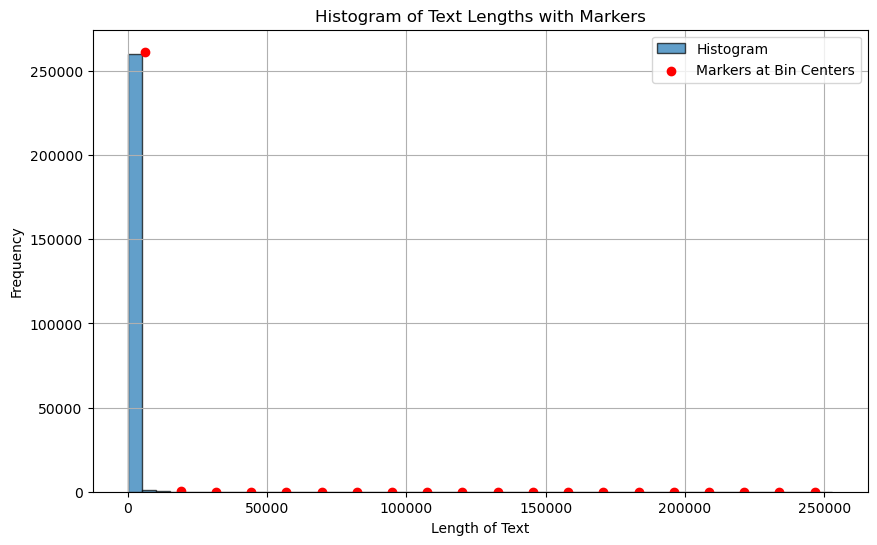

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Giả lập dữ liệu
np.random.seed(42)
lengths = np.array(corpus['len'])  # Giả lập dữ liệu cho corpus['len']

# Vẽ histogram với marker 'o'
counts, bins = np.histogram(lengths, bins=20)

# Tạo histogram
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=50, edgecolor='black', alpha=0.7, label='Histogram')

# Vẽ marker 'o' tại trung tâm của mỗi bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.scatter(bin_centers, counts, color='red', marker='o', label='Markers at Bin Centers')

plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths with Markers')
plt.grid(True)
plt.legend()
plt.show()


In [19]:
train

,question,context,cid,qid
0,Người học ngành quản lý khai thác công trình thủy lợi trình độ cao đẳng phải có khả năng học tập và nâng cao trình độ như thế nào?,"['Khả năng học tập, nâng cao trình độ\n- Khối lượng kiến thức tối thiểu, yêu cầu về năng lực mà người học phải đạt được sau khi tốt nghiệp ngành, nghề quản lý, khai thác các công trình thủy lợi, trình độ cao đẳng có thể tiếp tục phát triển ở các trình độ cao hơn;\n- Người học sau tốt nghiệp có năng lực tự học, tự cập nhật những tiến bộ khoa học công nghệ trong phạm vi ngành, nghề để nâng cao trình độ hoặc học liên thông lên trình độ cao hơn trong cùng ngành, nghề hoặc trong nhóm ngành, nghề hoặc trong cùng lĩnh vực đào tạo./.']",[62492],161615
1,Nội dung lồng ghép vấn đề bình đẳng giới trong xây dựng văn bản quy phạm pháp luật được quy định thế nào?,"['Nội dung lồng ghép vấn đề bình đẳng giới trong xây dựng văn bản quy phạm pháp luật\nTrong phạm vi điều chỉnh của văn bản quy phạm pháp luật:\n1. Xác định nội dung liên quan đến vấn đề bình đẳng giới hoặc vấn đề bất bình đẳng giới, phân biệt đối xử về giới.\n2. Quy định các biện pháp cần thiết để thực hiện bình đẳng giới hoặc để giải quyết vấn đề bất bình đẳng giới, phân biệt đối xử về giới; dự báo tác động của các quy định đó đối với nam và nữ sau khi được ban hành.\n3. Xác định nguồn nhân lực, tài chính cần thiết để triển khai các biện pháp thực hiện bình đẳng giới hoặc để giải quyết vấn đề bất bình đẳng giới, phân biệt đối xử về giới.']",[151154],80037
2,"Sản phẩm phần mềm có được hưởng ưu đãi về thời gian miễn thuế, giảm thuế hay không? Nếu được thì trong vòng bao nhiêu năm?","['""Điều 20. Ưu đãi về thời gian miễn thuế, giảm thuế\n1. Miễn thuế bốn năm, giảm 50% số thuế phải nộp trong chín năm tiếp theo đối với:\na) Thu nhập của doanh nghiệp từ thực hiện dự án đầu tư quy định tại khoản 1 Điều 19 Thông tư số 78/2014/TT-BTC (được sửa đổi, bổ sung tại Khoản 1 Điều 11 Thông tư này)."" ']",[75071],124074
3,"Điều kiện để giáo viên trong cơ sở giáo dục mầm non, tiểu học ngoài công lập bị ảnh hưởng bởi Covid-19 được hưởng chính sách hỗ trợ là gì?","['Điều kiện được hưởng\nCán bộ quản lý, giáo viên, nhân viên được hưởng chính sách khi bảo đảm các điều kiện sau:\n1. Là người đang làm việc tại cơ sở giáo dục ngoài công lập trước khi cơ sở phải tạm dừng hoạt động theo yêu cầu của cơ quan nhà nước có thẩm quyền để phòng, chống dịch COVID-19 tính từ ngày 01 tháng 5 năm 2021 đến hết ngày 31 tháng 12 năm 2021.\n2. Nghỉ việc không hưởng lương từ 01 tháng trở lên tính từ ngày 01 tháng 5 năm 2021 đến hết ngày 31 tháng 12 năm 2021.\n3. Chưa được hưởng chính sách hỗ trợ đối với người lao động tạm hoãn hợp đồng lao động, nghỉ việc không hưởng lương theo quy định tại khoản 4, khoản 5, khoản 6 Mục II Nghị quyết số 68/NQ-CP ngày 01 tháng 7 năm 2021 của Chính phủ về một số chính sách hỗ trợ người lao động và người sử dụng lao động gặp khó khăn do đại dịch COVID-19, Nghị quyết số 126/NQ-CP ngày 08 tháng 10 năm 2021 của Chính phủ sửa đổi, bổ sung Nghị quyết số 68/NQ-CP ngày 01 tháng 7 năm 2021 của Chính phủ về một số chính sách hỗ trợ người lao động và người sử dụng lao động gặp khó khăn do đại dịch COVID-19 (sau đây gọi tắt là Nghị quyết số 68/NQ-CP) do không tham gia Bảo hiểm xã hội bắt buộc.\n4. Có xác nhận làm việc tại cơ sở giáo dục ngoài công lập ít nhất hết năm học 2021 - 2022 theo kế hoạch năm học của địa phương, bao gồm cơ sở giáo dục ngoài công lập đã làm việc trước đây hoặc cơ sở giáo dục ngoài công lập khác trong trường hợp cơ sở giáo dục ngoài công lập trước đây làm việc không hoạt động trở lại.']",[225897],146841
4,Nguyên tắc áp dụng phụ cấp ưu đãi nghề y tế thế nào?,"['Nguyên tắc áp dụng\n1. Trường hợp công chức, viên chức chuyên môn y tế thuộc đối tượng được hưởng các mức phụ cấp ưu đãi theo nghề khác nhau thì được hưởng một mức phụ cấp ưu đãi theo nghề cao nhất.\n2. Công chức, viên chức đã hưởng phụ cấp ưu đãi theo nghề quy định tại Thông tư liên tịch số 06/2010/TTLT-BYT-BNV-BTC ngày 22/3/2010 của Bộ Y tế, Bộ Nội vụ, Bộ Tài chính 